In [18]:
import yfinance as yf
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

In [3]:
ticker_symbol = "DX-Y.NYB"
ticker = yf.Ticker(ticker_symbol)
df = ticker.history(period="5y").reset_index(drop=False)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999,0,0.0,0.0
1,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003,0,0.0,0.0
2,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003,0,0.0,0.0
3,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000,0,0.0,0.0
4,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001,0,0.0,0.0
...,...,...,...,...,...,...,...,...
1253,2025-10-30 00:00:00-04:00,99.139999,99.720001,98.919998,99.529999,0,0.0,0.0
1254,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003,0,0.0,0.0
1255,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003,0,0.0,0.0
1256,2025-11-04 00:00:00-05:00,99.980003,100.260002,99.739998,100.220001,0,0.0,0.0


In [4]:
df = df.drop(columns=['Volume', 'Dividends', 'Stock Splits'])
df

,Date,Open,High,Low,Close
0,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999
1,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003
2,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003
3,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000
4,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001
...,...,...,...,...,...
1253,2025-10-30 00:00:00-04:00,99.139999,99.720001,98.919998,99.529999
1254,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003
1255,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003
1256,2025-11-04 00:00:00-05:00,99.980003,100.260002,99.739998,100.220001


# Task 1: Line plot for USD over the last 5 years

In [5]:
fig = px.line(df, x='Date', y=['Open', 'High', 'Low', 'Close'])

fig.update_layout(
    title="USD over the last 5 years",
    xaxis_title="Date",
    yaxis_title="Price (USD)",
    hovermode="x unified",
)
fig.show()

# Task 2: Non-stationary timeseries

The line plot shows that the time series are non-stationary cause they constantly shift their value away from the average.

# Task 3:  Regressor on a non-stationary time series

Training a regressor on a non-stationary time series, such as the USD index, leads to unreliable results because the statistical properties of the data its mean, variance, and trend change over time. This instability causes the model to learn patterns that reflect temporary movements rather than lasting relationships, making predictions inaccurate when market conditions shift. Non-stationarity also introduces spurious correlations and violates regression assumptions like constant variance and independent errors, so the model’s coefficients lose interpretability. So, the regressor ends up fitting noise and trends that do not persist, which results in weak generalization and misleading forecasts.

# Task 4:  USD index in June vs July

In [6]:
mask = (df['Date'] >= "2025-06-01") & (df['Date'] <= "2025-07-31")
df_filtered = df.loc[mask]
df_filtered[['Date', 'Open', 'High', 'Low', 'Close']]

,Date,Open,High,Low,Close
1148,2025-06-02 00:00:00-04:00,99.410004,99.419998,98.610001,98.699997
1149,2025-06-03 00:00:00-04:00,98.589996,99.330002,98.580002,99.250000
1150,2025-06-04 00:00:00-04:00,99.180000,99.389999,98.669998,98.790001
1151,2025-06-05 00:00:00-04:00,98.800003,98.940002,98.349998,98.739998
1152,2025-06-06 00:00:00-04:00,98.699997,99.360001,98.660004,99.190002
1153,2025-06-09 00:00:00-04:00,99.199997,99.230003,98.820000,98.940002
1154,2025-06-10 00:00:00-04:00,98.980003,99.389999,98.860001,99.050003
1155,2025-06-11 00:00:00-04:00,98.959999,99.220001,98.529999,98.629997
1156,2025-06-12 00:00:00-04:00,98.459999,98.519997,97.599998,97.919998
1157,2025-06-13 00:00:00-04:00,97.809998,98.589996,97.620003,98.180000


In April after announcements about tariffs and the subsequent policy and economic uncertainties. Increasing worries about growth, inflation and public debt added negative pressure. The USD index lost almost 7% from the beginning of April to the end of June, also it  dropped as low as its lowest level since February 2022. As we see the dollar rebounded in the end of July.

# Task 5

It is very difficault to make an exact deterministic function that will always be correct, because the non-stationarity and market efficiency produce model drift and spurious correlations, and there will always be an error that we cannot eliminate.

# Task 6

Time-series data have a temporal dependency, past values influence future ones. Randomly shuffling the data would destroy this natural order and allow information from the future to leak into the training phase. As a result, the model produce unrealistically high accuracy and invalid results.

# Task 7: train-test split

In [7]:
train_df = df[df['Date'] < "2024-01-01 00:00:00"]
test_df = df[df['Date'] >= "2024-01-01 00:00:00"]
train_df = train_df.drop(columns=['Date'])
test_df = test_df.drop(columns=['Date'])

train_df.shape, test_df.shape

((792, 4), (466, 4))

In [8]:
train_df

,Open,High,Low,Close
0,93.339996,93.550003,92.489998,92.529999
1,92.570000,92.820000,92.180000,92.230003
2,92.239998,92.959999,92.129997,92.730003
3,92.760002,92.970001,92.599998,92.750000
4,92.699997,93.209999,92.610001,93.040001
...,...,...,...,...
787,101.760002,101.900002,101.430000,101.699997
788,101.650002,101.769997,101.449997,101.470001
789,101.550003,101.570000,100.830002,100.989998
790,100.870003,101.300003,100.620003,101.230003


# Task 8: create timeframes

In [9]:
def create_timeframes(data_df, n):
    timeframes = []
    timeframe_targets = []
    data_array = data_df.to_numpy()

    for i in range(data_df.shape[0] - n):
        end = i + n
        timeframes.append(data_array[i:end])
        timeframe_targets.append(data_df['Close'].iloc[end])  # next day's Close

    return np.array(timeframes), np.array(timeframe_targets)

In [10]:
inputs, targets = create_timeframes(train_df, 3)
inputs[0], targets[0],inputs.shape, targets.shape

(array([[93.33999634, 93.55000305, 92.48999786, 92.52999878],
        [92.56999969, 92.81999969, 92.18000031, 92.23000336],
        [92.23999786, 92.95999908, 92.12999725, 92.73000336]]),
 np.float64(92.75),
 (789, 3, 4),
 (789,))

# Task 9: Suitable timeframe size

For estimations in the near future, it is best to use a small timeframe. If we want to predict the next day’s price, we need a small timeframe, so we need a small value of N. However, if we aim to predict a more distant horizon, such as one month ahead, we should increase the timeframe to capture broader market trends. In this case, choosing N=21 makes sense because financial markets operate on trading days, not calendar days. One month corresponds to roughly 21 trading days therefore, this allows the model to learn from approximately one month of market activity, providing enough historical context.

# Task 10

In [11]:
x_train, y_train = create_timeframes(train_df, 5)
x_test, y_test = create_timeframes(test_df, 5)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((787, 5, 4), (787,), (461, 5, 4), (461,))

In [12]:
n = 5
num_features = train_df.shape[1]

x_train_flat = x_train.reshape((x_train.shape[0], n*num_features))
x_test_flat = x_test.reshape((x_test.shape[0], n*num_features))
x_train_flat.shape, x_test_flat.shape

((787, 20), (461, 20))

In [13]:
x_train[0]

array([[93.33999634, 93.55000305, 92.48999786, 92.52999878],
       [92.56999969, 92.81999969, 92.18000031, 92.23000336],
       [92.23999786, 92.95999908, 92.12999725, 92.73000336],
       [92.76000214, 92.97000122, 92.59999847, 92.75      ],
       [92.69999695, 93.20999908, 92.61000061, 93.04000092]])

# Task 11: Train and evaluate models based on MAE

In [39]:
def train_and_evaluate_models(x_train, y_train, x_test, y_test):
    models = {
        "a) Linear Regression": LinearRegression(),
        "b) Random Forest Regressor": RandomForestRegressor(),
        "c) Bagging (LR)": BaggingRegressor(estimator=LinearRegression()),
        "d) XGBoost": XGBRegressor(),
        "e) Stacking (LR + DT)": StackingRegressor(
            estimators=[("lr", LinearRegression()), ("dt", DecisionTreeRegressor())],
            final_estimator=LinearRegression()
        )
    }

    train_mae, test_mae = {}, {}

    # train and evaluate
    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)

        train_mae[name] = mean_absolute_error(y_train, y_pred_train)
        test_mae[name] = mean_absolute_error(y_test, y_pred_test)

        print(f"{name}: Train MAE: {train_mae[name]:.4f}, Test MAE: {test_mae[name]:.4f}")

    return train_mae, test_mae

In [40]:
train_mae, test_mae = train_and_evaluate_models(x_train_flat, y_train, x_test_flat, y_test)


a) Linear Regression: Train MAE: 0.3454, Test MAE: 0.3353
b) Random Forest Regressor: Train MAE: 0.1471, Test MAE: 0.3909
c) Bagging (LR): Train MAE: 0.3461, Test MAE: 0.3382
d) XGBoost: Train MAE: 0.0216, Test MAE: 0.4432
e) Stacking (LR + DT): Train MAE: 0.3578, Test MAE: 0.3379


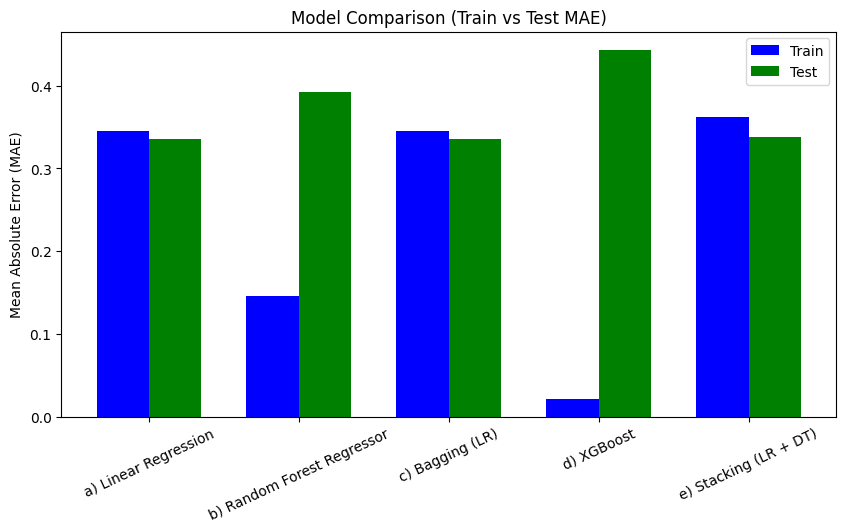

In [34]:
# MAE comparison
labels = list(train_mae.keys())
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, [train_mae[l] for l in labels], width, label='Train', color='blue')
plt.bar(x + width/2, [test_mae[l] for l in labels], width, label='Test', color='green')
plt.xticks(x, labels, rotation=25)
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Model Comparison (Train vs Test MAE)")
plt.legend()
plt.show()

a) **Linear Regression** is stable and generalizes decently cause the training and testing errors are close, but its simplicity limits accuracy.

b) **Random Forest** is overfitting , it fits training data too closely and fails to generalize , cause we have very low training error but a much higher test error. With raw time-series data (which has strong temporal correlations) espesially non-stationary, random forest does not usually do well, it  can memorize historical patterns that don’t repeat in new data or it might ignore the time-dependent nature of the data.

c) **Bagging with Linear Regression** behaves almost the same as plain  Linear Regression. No overfitting, but no real improvement either.

d) **XGBoost** overfits heavily on this dataset, it has extremely low training error and very high test error. As with Random forest, XGBoost has low accuracy with raw time-series data espesially non-stationary.

e) **Stacking** provides balanced performance, it generalizes decently

In conclusion simple models (Linear Regression, Bagging(LR), Stacking) generalize better and dont  overfit too much, but the accuracy is generally low.

# Task 12: Performance Improval

## a) Feature engineering

In [42]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df.head()

,Date,Open,High,Low,Close,Day,Month
0,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999,5,11
1,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003,6,11
2,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003,9,11
3,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000,10,11
4,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001,11,11


Adding the month feature introduces seasonality awareness, allowing the model to learn repeating annual patterns that influence the dollar’s value. The dollar’s value shows seasonal behavior, for example, certain months tend to have stronger or weaker performance due to trade flows for example. Adding the month gives the model a sense of where in the year the observation occurs, improving its ability to maybe detect recurring annual patterns.

## b) Log returns

In [52]:
df_log_returns = df.copy()
for col in ['Open', 'High', 'Low', 'Close']:
    df_log_returns[col] = np.log(1 + df_log_returns[col].pct_change())
df_log_returns

,Date,Open,High,Low,Close,Day,Month
0,2020-11-05 00:00:00-05:00,NaN,NaN,NaN,NaN,5,11
1,2020-11-06 00:00:00-05:00,-0.008284,-0.007834,-0.003357,-0.003247,6,11
2,2020-11-09 00:00:00-05:00,-0.003571,0.001507,-0.000543,0.005407,9,11
3,2020-11-10 00:00:00-05:00,0.005622,0.000108,0.005089,0.000216,10,11
4,2020-11-11 00:00:00-05:00,-0.000647,0.002578,0.000108,0.003122,11,11
...,...,...,...,...,...,...,...
1253,2025-10-30 00:00:00-04:00,0.004043,0.003617,0.003037,0.003119,30,10
1254,2025-10-31 00:00:00-04:00,0.003524,0.001203,0.005042,0.002709,31,10
1255,2025-11-03 00:00:00-05:00,0.002610,0.001501,0.002913,0.000701,3,11
1256,2025-11-04 00:00:00-05:00,0.002303,0.002697,0.000301,0.003498,4,11


When the value of a variable increases in the next timestep, log returns should be positive.

When the value of a variable decreases in the next timestep, log returns should be negative.

## c) Histogramms for the converted columns and impact of log returns

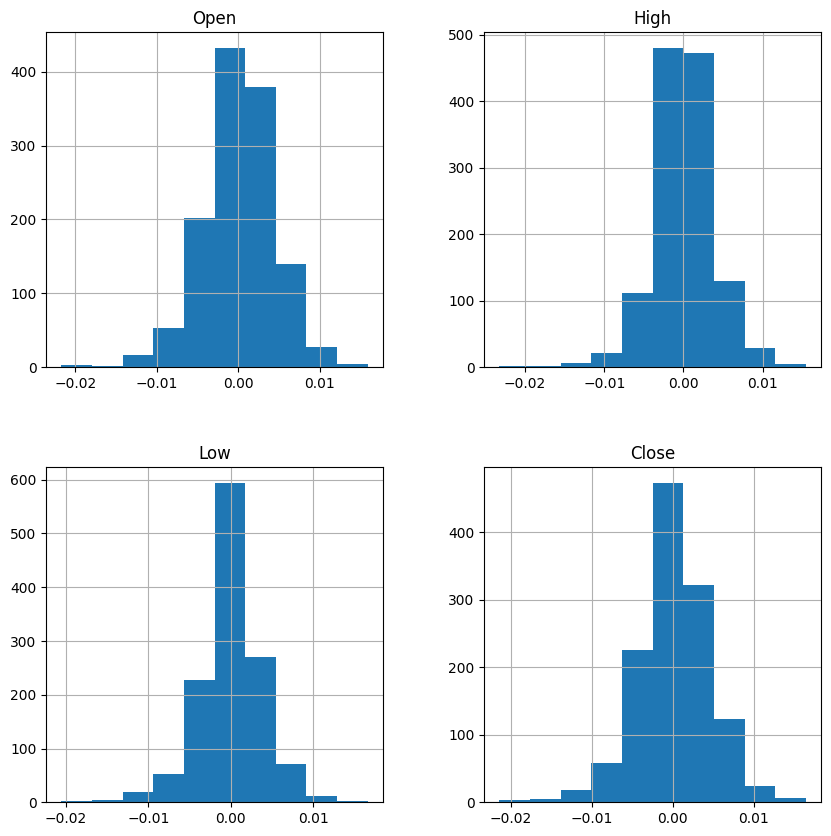

In [46]:
df_logs_filtered = df_log_returns.drop(columns=['Date', 'Day', 'Month'])
df_logs_filtered.hist(figsize=(10, 10))
plt.show()

By using logarithmic returns, we convert the inputs into more stationary like and interpretable signals.
This transformation helps the model detect true patterns of movement rather than just raw price levels, often resulting in more stable and accurate forecasts.

## d)

A prediction of 𝐶𝑡+1=0.01 means the model expects a positive return of 0.01, which is roughly 1% growth in the Close price from today to tomorrow.

## e) Retraining the models after the log returns application and the feature engineering process

In [80]:
df_log_returns=df_log_returns.dropna()
df_log_returns

,Date,Open,High,Low,Close,Day,Month
1,2020-11-06 00:00:00-05:00,-0.008284,-0.007834,-0.003357,-0.003247,6,11
2,2020-11-09 00:00:00-05:00,-0.003571,0.001507,-0.000543,0.005407,9,11
3,2020-11-10 00:00:00-05:00,0.005622,0.000108,0.005089,0.000216,10,11
4,2020-11-11 00:00:00-05:00,-0.000647,0.002578,0.000108,0.003122,11,11
5,2020-11-12 00:00:00-05:00,0.003339,-0.000751,0.001834,-0.000860,12,11
...,...,...,...,...,...,...,...
1253,2025-10-30 00:00:00-04:00,0.004043,0.003617,0.003037,0.003119,30,10
1254,2025-10-31 00:00:00-04:00,0.003524,0.001203,0.005042,0.002709,31,10
1255,2025-11-03 00:00:00-05:00,0.002610,0.001501,0.002913,0.000701,3,11
1256,2025-11-04 00:00:00-05:00,0.002303,0.002697,0.000301,0.003498,4,11


In [81]:
train_df = df_log_returns[df_log_returns['Date'] < "2024-01-01 00:00:00"]
test_df = df_log_returns[df_log_returns['Date'] >= "2024-01-01 00:00:00"]
train_df = train_df.drop(columns=['Date'])
test_df = test_df.drop(columns=['Date'])

train_df.shape, test_df.shape

((791, 6), (466, 6))

In [82]:
x_train, y_train = create_timeframes(train_df, 5)
x_test, y_test = create_timeframes(test_df, 5)

n = 5
num_features = train_df.shape[1]

x_train_flat = x_train.reshape((x_train.shape[0], n*num_features))
x_test_flat = x_test.reshape((x_test.shape[0], n*num_features))
x_train_flat.shape, x_test_flat.shape

((786, 30), (461, 30))

In [83]:
train_mae, test_mae = train_and_evaluate_models(x_train_flat, y_train, x_test_flat, y_test)


a) Linear Regression: Train MAE: 0.0034, Test MAE: 0.0034
b) Random Forest Regressor: Train MAE: 0.0013, Test MAE: 0.0033
c) Bagging (LR): Train MAE: 0.0034, Test MAE: 0.0034
d) XGBoost: Train MAE: 0.0005, Test MAE: 0.0037
e) Stacking (LR + DT): Train MAE: 0.0035, Test MAE: 0.0032


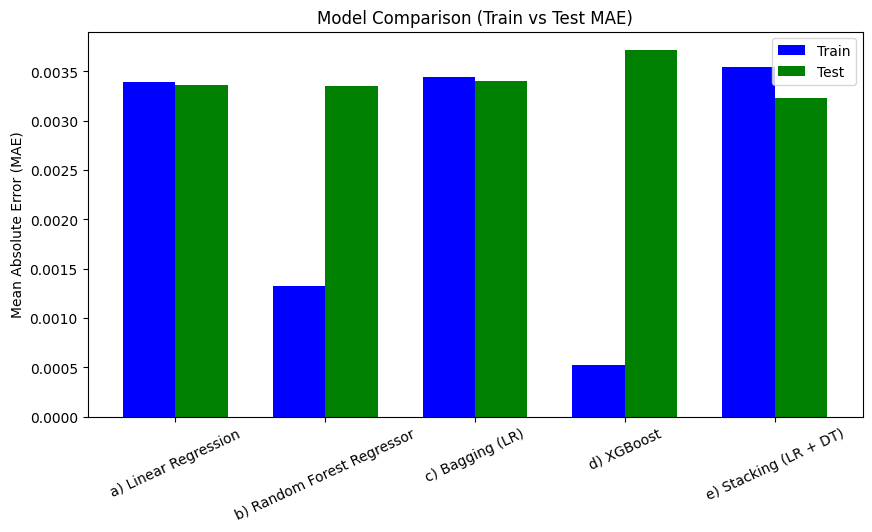

In [84]:
# MAE comparison
labels = list(train_mae.keys())
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, [train_mae[l] for l in labels], width, label='Train', color='blue')
plt.bar(x + width/2, [test_mae[l] for l in labels], width, label='Test', color='green')
plt.xticks(x, labels, rotation=25)
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Model Comparison (Train vs Test MAE)")
plt.legend()
plt.show()

The MAE decreased dramatically for all models, from values around 0.3–0.4 in raw prices to around 0.003 in log returns. This is expected because log returns scale the changes to a small range and the models now predict returns.
Overall, the performanse is cosistent to the previous results  with similar train/test MAE values.

a) Linear Regression: Consistent performance

b) Random Forest Regressor: It still overfits

c) Bagging (LR): Consistent performance

d) XGBoost: It still overfits a lot

e) Stacking (LR + DT): Consistent performance




## Task 13: Convert log returns back to absolute prices

In [62]:
# best model best on MAE results
model= LinearRegression()
model.fit(x_train_flat, y_train)
y_pred_train = model.predict(x_train_flat)
y_pred_test = model.predict(x_test_flat)

In [74]:
N=5
# C_t_aligned is an array of the previous day’s Close values, aligned with the predictions
C_t_aligned = test_df['Close'].to_numpy()[N-1:-1]   # previous day's close
y_pred_abs = C_t_aligned * np.exp(y_pred_test)       # predicted next day's close
y_test_abs = C_t_aligned * np.exp(y_test)  # actual close value
